# DATA ACQUISITION AND PREPARATION

##1.1 ADHD DATA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import os
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content


In [ ]:
#new_dir = "/content/drive/MyDrive"

#os.chdir(new_dir)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the ADHD data from each CSV file
df1 = pd.read_csv('/content/drive/MyDrive/Data/ADHD/v1p.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data/ADHD/v3p.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data/ADHD/v6p.csv')

# Concatenate the DataFrames into a single DataFrame
combined_df_ADHD = pd.concat([df1, df2, df3])

# Write the combined DataFrame to a new CSV file
combined_df_ADHD.to_csv('combined_ADHD.csv', index=False)

In [ ]:
# Reading the ADHD data
df_ADHD = pd.read_csv('/content/drive/MyDrive/Data/ADHD/combined_ADHD.csv')

# # Print the first five row
df_ADHD.head()


4802  191   16  -55  -20  -167  16.1  -167.1   -57   52  568   89  200  \
0   191   50  457  367  752   457   641     604 -1198  310  420  273  420   
1   121   50   89 -160   89   126    52     347  1819  -20   89   52   89   
2   332  156  457  402  604   420   531     568  -646  420  678  273  494   
3   226  226  384  156  310   310   126     384   163   52  163  310   89   
4   297  191  126  -55   52    52   -94     200   825  163  200   89  163   

   -167.2  310  16.2  -90  -301  -160  result  
0     347  126   420  -90   297   473       0  
1      52   16    89  860   121   367       0  
2     457   89   384 -794   578   649       0  
3     163   52   236  860   -55    85       0  
4     126  -20   126  -90   226   332       0

In [ ]:
# Print the dimension of data
df_ADHD.shape

(63386, 20)

In [ ]:
df_ADHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63386 entries, 0 to 63385
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   4802    63386 non-null  int64
 1   191     63386 non-null  int64
 2   16      63386 non-null  int64
 3   -55     63386 non-null  int64
 4   -20     63386 non-null  int64
 5   -167    63386 non-null  int64
 6   16.1    63386 non-null  int64
 7   -167.1  63386 non-null  int64
 8   -57     63386 non-null  int64
 9   52      63386 non-null  int64
 10  568     63386 non-null  int64
 11  89      63386 non-null  int64
 12  200     63386 non-null  int64
 13  -167.2  63386 non-null  int64
 14  310     63386 non-null  int64
 15  16.2    63386 non-null  int64
 16  -90     63386 non-null  int64
 17  -301    63386 non-null  int64
 18  -160    63386 non-null  int64
 19  result  63386 non-null  int64
dtypes: int64(20)
memory usage: 9.7 MB


In [ ]:
df_ADHD.describe()

4802           191            16           -55           -20  \
count  63386.000000  63386.000000  63386.000000  63386.000000  63386.000000   
mean     138.156296    138.526599    143.797684    137.486622    144.230808   
std      379.666731    385.886078    218.515224    194.240006    188.484111   
min    -3117.000000 -13224.000000  -2817.000000 -13237.000000   -903.000000   
25%       15.000000     15.000000     16.000000     50.000000     16.000000   
50%      156.000000    156.000000    126.000000    121.000000    126.000000   
75%      261.000000    261.000000    236.000000    226.000000    273.000000   
max    13813.000000   4133.000000   5018.000000   3007.000000   5430.000000   

               -167          16.1        -167.1           -57            52  \
count  63386.000000  63386.000000  63386.000000  63386.000000  63386.000000   
mean     143.685483    144.201007    143.258653    143.218566    142.590935   
std      167.466330    196.107060    175.483035    181.159517    287.690402   
min    -3553.000000   -867.000000  -2964.000000  -1529.000000  -3921.000000   
25%       52.000000     16.000000     52.000000     52.000000     52.000000   
50%      126.000000    126.000000    126.000000    126.000000    126.000000   
75%      236.000000    273.000000    236.000000    236.000000    236.000000   
max     5018.000000   5020.000000   5020.000000   5020.000000   5016.000000   

                568            89           200        -167.2           310  \
count  63386.000000  63386.000000  63386.000000  63386.000000  63386.000000   
mean     142.959392    141.119821    142.558499    140.475200    142.153725   
std      165.549064    138.677727    152.569644    168.682743    153.585341   
min    -2854.000000  -3516.000000  -1823.000000  -3295.000000  -1051.000000   
25%       52.000000     52.000000     52.000000     52.000000     52.000000   
50%      126.000000    126.000000    126.000000    126.000000    126.000000   
75%      236.000000    200.000000    200.000000    236.000000    200.000000   
max     5020.000000   5016.000000   5020.000000   5016.000000   5016.000000   

               16.2           -90          -301          -160   result  
count  63386.000000  63386.000000  63386.000000  63386.000000  63386.0  
mean     140.334553    133.956489    133.398148    133.795728      0.0  
std      145.200775    259.877537    173.046770    191.744480      0.0  
min    -3406.000000  -3751.000000  -3258.000000   -864.000000      0.0  
25%       89.000000     15.000000     15.000000     15.000000      0.0  
50%      126.000000    121.000000    121.000000    121.000000      0.0  
75%      200.000000    226.000000    226.000000    226.000000      0.0  
max     5016.000000   4802.000000   4802.000000   4802.000000      0.0

## 1.2 CONTROL DATA


In [ ]:
# Read in the Control data from each CSV file
df4 = pd.read_csv('/content/drive/MyDrive/Data/CONTROL/v41p.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Data/CONTROL/v42p.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Data/CONTROL/v43p.csv')

# Concatenate the DataFrames into a single DataFrame
combined_df_control = pd.concat([df4, df5, df6])

# Write the combined DataFrame to a new CSV file
#combined_df_control.to_csv('combined_Control.csv', index=False)

In [ ]:
# Reading the Control data
df_control = pd.read_csv('/content/drive/MyDrive/Data/CONTROL/combined_Control.csv')

# Print the first five row
df_control.head()

367  156  310  156.1  384  163  420  200  420.1  273  310.1  200.1  384.1  \
0  473   85  531    226  494  163  494   52    531  163    604    200    568   
1  402  -19  531     85  457  -20  420 -241    347  -57    457     89    457   
2  332   50  457    191  384  -20  273 -388    310 -241    494    163    494   
3  437  121  568    261  494   52  384 -315    384  -57    494    126    568   
4   50 -160  273     50  273  -20  200 -241    273  -20    200     89    384   

   200.2  384.2  163.1  367.1  156.2  508  result  
0    236    568    163    508     85  402       1  
1    126    457    -57    332     15  226       1  
2    163    420   -131    473     50   15       1  
3    200    568    -20    402    -19   85       1  
4    126    420     52    226     15   50       1

In [ ]:
# Print the dimension of data
df_control.shape

(41951, 20)

In [ ]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41951 entries, 0 to 41950
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   367     41951 non-null  int64
 1   156     41951 non-null  int64
 2   310     41951 non-null  int64
 3   156.1   41951 non-null  int64
 4   384     41951 non-null  int64
 5   163     41951 non-null  int64
 6   420     41951 non-null  int64
 7   200     41951 non-null  int64
 8   420.1   41951 non-null  int64
 9   273     41951 non-null  int64
 10  310.1   41951 non-null  int64
 11  200.1   41951 non-null  int64
 12  384.1   41951 non-null  int64
 13  200.2   41951 non-null  int64
 14  384.2   41951 non-null  int64
 15  163.1   41951 non-null  int64
 16  367.1   41951 non-null  int64
 17  156.2   41951 non-null  int64
 18  508     41951 non-null  int64
 19  result  41951 non-null  int64
dtypes: int64(20)
memory usage: 6.4 MB


In [ ]:

df_control.describe()

367           156           310         156.1           384  \
count  41951.000000  41951.000000  41951.000000  41951.000000  41951.000000   
mean     138.983481    139.651689    145.675121    139.781745    145.664060   
std      327.922976    458.970747    279.744836    413.734703    254.973692   
min    -2941.000000  -3751.000000  -2486.000000  -3680.000000  -2780.000000   
25%      -55.000000    -19.000000    -20.000000    -19.000000     16.000000   
50%      121.000000    121.000000    126.000000    121.000000    126.000000   
75%      332.000000    297.000000    310.000000    297.000000    273.000000   
max     3113.000000   4802.000000   3401.000000   4802.000000   3217.000000   

                163           420           200         420.1           273  \
count  41951.000000  41951.000000  41951.000000  41951.000000  41951.000000   
mean     146.274320    145.644156    145.801626    145.698529    146.525065   
std      410.837174    273.541703    409.893348    276.833787    440.547596   
min    -3921.000000  -2633.000000  -3884.000000  -2449.000000  -3847.000000   
25%       16.000000    -20.000000     16.000000     16.000000    -20.000000   
50%      126.000000    126.000000    126.000000    126.000000    126.000000   
75%      273.000000    310.000000    273.000000    273.000000    310.000000   
max     4064.000000   3254.000000   3916.000000   3144.000000   3916.000000   

              310.1         200.1         384.1         200.2         384.2  \
count  41951.000000  41951.000000  41951.000000  41951.000000  41951.000000   
mean     145.903363    146.471932    146.075993    146.631165    146.171676   
std      268.163591    388.002887    250.874340    401.848402    237.229640   
min    -2670.000000  -3884.000000  -2633.000000  -3884.000000  -2927.000000   
25%      -20.000000     16.000000     16.000000     16.000000     16.000000   
50%      126.000000    126.000000    126.000000    126.000000    163.000000   
75%      310.000000    236.000000    273.000000    236.000000    273.000000   
max     3622.000000   4064.000000   3291.000000   4100.000000   3548.000000   

              163.1         367.1         156.2           508   result  
count  41951.000000  41951.000000  41951.000000  41951.000000  41951.0  
mean     146.425925    140.241281    140.730996    140.281996      1.0  
std      387.335436    258.550884    394.443064    235.410087      0.0  
min    -3847.000000  -2307.000000  -3715.000000  -2519.000000      1.0  
25%       52.000000    -19.000000     15.000000     15.000000      1.0  
50%      126.000000    156.000000    121.000000    156.000000      1.0  
75%      236.000000    297.000000    261.000000    261.000000      1.0  
max     3990.000000   3042.000000   3887.000000   3042.000000      1.0

# *DATA CLEANING AND PRE-PROCESSING*

In [ ]:
# Add a new column with a value of 0 in all rows of ADHD Data


df_ADHD.head()

4802  191   16  -55  -20  -167  16.1  -167.1   -57   52  568   89  200  \
0   191   50  457  367  752   457   641     604 -1198  310  420  273  420   
1   121   50   89 -160   89   126    52     347  1819  -20   89   52   89   
2   332  156  457  402  604   420   531     568  -646  420  678  273  494   
3   226  226  384  156  310   310   126     384   163   52  163  310   89   
4   297  191  126  -55   52    52   -94     200   825  163  200   89  163   

   -167.2  310  16.2  -90  -301  -160  result  
0     347  126   420  -90   297   473       0  
1      52   16    89  860   121   367       0  
2     457   89   384 -794   578   649       0  
3     163   52   236  860   -55    85       0  
4     126  -20   126  -90   226   332       0

In [ ]:
# Print the dimension of data
df_ADHD.shape


(63386, 20)

In [ ]:
# Add a new column with a value of 1 in all rows Control healthy data
df_control.head()

367  156  310  156.1  384  163  420  200  420.1  273  310.1  200.1  384.1  \
0  473   85  531    226  494  163  494   52    531  163    604    200    568   
1  402  -19  531     85  457  -20  420 -241    347  -57    457     89    457   
2  332   50  457    191  384  -20  273 -388    310 -241    494    163    494   
3  437  121  568    261  494   52  384 -315    384  -57    494    126    568   
4   50 -160  273     50  273  -20  200 -241    273  -20    200     89    384   

   200.2  384.2  163.1  367.1  156.2  508  result  
0    236    568    163    508     85  402       1  
1    126    457    -57    332     15  226       1  
2    163    420   -131    473     50   15       1  
3    200    568    -20    402    -19   85       1  
4    126    420     52    226     15   50       1

In [ ]:
# Print the dimension of data
df_control.shape

(41951, 20)

In [ ]:

# Reading the Combine data
df = pd.read_csv('/content/drive/MyDrive/Data/combined_data.csv')

# Print the first ten row
df.head(10)

4802  191   16  -55  -20  -167  16.1  -167.1   -57   52  568   89  200  \
0   191   50  457  367  752   457   641     604 -1198  310  420  273  420   
1   121   50   89 -160   89   126    52     347  1819  -20   89   52   89   
2   332  156  457  402  604   420   531     568  -646  420  678  273  494   
3   226  226  384  156  310   310   126     384   163   52  163  310   89   
4   297  191  126  -55   52    52   -94     200   825  163  200   89  163   
5   297  297  457  402  494   310   568     420 -1345  384  347  347  310   
6   156  226   52 -266 -241  -131    16      52  1782  -20 -167   89  -57   
7   226  226  200  121   89   -57   420      89   -94  384  347  126  310   
8   121  261  163   85  -94   -94   347     -57   126   52  -20  163   16   
9   156  156 -167 -231 -462  -462   -94    -351  1414  -20  -20 -131  -57   

   -167.2  310  16.2   -90  -301  -160  result  
0     347  126   420   -90   297   473       0  
1      52   16    89   860   121   367       0  
2     457   89   384  -794   578   649       0  
3     163   52   236   860   -55    85       0  
4     126  -20   126   -90   226   332       0  
5     310  236   347  -371   156   226       0  
6    -131  236   -20  1001  -301  -160       0  
7      89  347   126  -829   121   121       0  
8    -131  420    16   543  -477  -371       0  
9    -278  200  -204   -19  -336  -195       0

In [ ]:

# Print the dimension of data
df.shape

(105337, 20)

Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance.

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105337 entries, 0 to 105336
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   4802    105337 non-null  int64
 1   191     105337 non-null  int64
 2   16      105337 non-null  int64
 3   -55     105337 non-null  int64
 4   -20     105337 non-null  int64
 5   -167    105337 non-null  int64
 6   16.1    105337 non-null  int64
 7   -167.1  105337 non-null  int64
 8   -57     105337 non-null  int64
 9   52      105337 non-null  int64
 10  568     105337 non-null  int64
 11  89      105337 non-null  int64
 12  200     105337 non-null  int64
 13  -167.2  105337 non-null  int64
 14  310     105337 non-null  int64
 15  16.2    105337 non-null  int64
 16  -90     105337 non-null  int64
 17  -301    105337 non-null  int64
 18  -160    105337 non-null  int64
 19  result  105337 non-null  int64
dtypes: int64(20)
memory usage: 16.1 MB


In [ ]:

print(df['result'].unique())


[0 1]


# 3.EXPLORATORY DATA ANALYSIS

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [ ]:
df.corr()

4802       191        16       -55       -20      -167      16.1  \
4802    1.000000  0.514846  0.646085  0.311412  0.418310  0.212787  0.393354   
191     0.514846  1.000000  0.258963  0.601367  0.123000  0.502698  0.070468   
16      0.646085  0.258963  1.000000  0.418145  0.713268  0.336201  0.624283   
-55     0.311412  0.601367  0.418145  1.000000  0.328496  0.831094  0.261676   
-20     0.418310  0.123000  0.713268  0.328496  1.000000  0.427506  0.789268   
-167    0.212787  0.502698  0.336201  0.831094  0.427506  1.000000  0.353281   
16.1    0.393354  0.070468  0.624283  0.261676  0.789268  0.353281  1.000000   
-167.1  0.144656  0.451552  0.243743  0.724760  0.329495  0.859417  0.374505   
-57     0.253784  0.065387  0.421619  0.179165  0.470023  0.196205  0.647948   
52      0.035608  0.286360  0.077484  0.450326  0.238730  0.628102  0.199626   
568     0.557472  0.310958  0.669204  0.361225  0.641139  0.314300  0.566187   
89      0.298531  0.603615  0.333362  0.821075  0.313050  0.847001  0.252056   
200     0.458131  0.162406  0.610700  0.257902  0.672165  0.274999  0.681407   
-167.2  0.233461  0.539500  0.285608  0.801490  0.294167  0.872741  0.249725   
310     0.371032  0.082243  0.531780  0.203780  0.654521  0.265896  0.724939   
16.2    0.204578  0.521404  0.224703  0.757375  0.262984  0.841805  0.270704   
-90     0.458972  0.247359  0.643198  0.435215  0.500263  0.288967  0.435874   
-301    0.147552  0.520397  0.246308  0.778987  0.350313  0.880094  0.250315   
-160    0.216844  0.045450  0.403729  0.179203  0.570126  0.286674  0.672010   
result  0.001125  0.001322  0.003755  0.003727  0.003227  0.004370  0.003070   

          -167.1       -57        52       568        89       200    -167.2  \
4802    0.144656  0.253784  0.035608  0.557472  0.298531  0.458131  0.233461   
191     0.451552  0.065387  0.286360  0.310958  0.603615  0.162406  0.539500   
16      0.243743  0.421619  0.077484  0.669204  0.333362  0.610700  0.285608   
-55     0.724760  0.179165  0.450326  0.361225  0.821075  0.257902  0.801490   
-20     0.329495  0.470023  0.238730  0.641139  0.313050  0.672165  0.294167   
-167    0.859417  0.196205  0.628102  0.314300  0.847001  0.274999  0.872741   
16.1    0.374505  0.647948  0.199626  0.566187  0.252056  0.681407  0.249725   
-167.1  1.000000  0.289207  0.698093  0.279415  0.780769  0.277580  0.825950   
-57     0.289207  1.000000  0.154508  0.513436  0.182649  0.503863  0.191191   
52      0.698093  0.154508  1.000000  0.013999  0.568301  0.038686  0.585139   
568     0.279415  0.513436  0.013999  1.000000  0.365300  0.769359  0.335724   
89      0.780769  0.182649  0.568301  0.365300  1.000000  0.292174  0.887985   
200     0.277580  0.503863  0.038686  0.769359  0.292174  1.000000  0.274177   
-167.2  0.825950  0.191191  0.585139  0.335724  0.887985  0.274177  1.000000   
310     0.297446  0.564041  0.154847  0.636801  0.247613  0.757511  0.240973   
16.2    0.871010  0.246941  0.660405  0.256434  0.827675  0.253851  0.862418   
-90     0.164980  0.326768 -0.205495  0.633281  0.319987  0.545922  0.277143   
-301    0.830016  0.164522  0.597130  0.310492  0.818482  0.274776  0.830997   
-160    0.402429  0.515231  0.211679  0.499424  0.226766  0.589014  0.243421   
result  0.004259  0.005415  0.005402  0.006784  0.009796  0.008711  0.010560   

             310      16.2       -90      -301      -160    result  
4802    0.371032  0.204578  0.458972  0.147552  0.216844  0.001125  
191     0.082243  0.521404  0.247359  0.520397  0.045450  0.001322  
16      0.531780  0.224703  0.643198  0.246308  0.403729  0.003755  
-55     0.203780  0.757375  0.435215  0.778987  0.179203  0.003727  
-20     0.654521  0.262984  0.500263  0.350313  0.570126  0.003227  
-167    0.265896  0.841805  0.288967  0.880094  0.286674  0.004370  
16.1    0.724939  0.270704  0.435874  0.250315  0.672010  0.003070  
-167.1  0.297446  0.871010  0.164980  0.830016  0.402429  0.004259  
-57     0.564041  0.246941  0

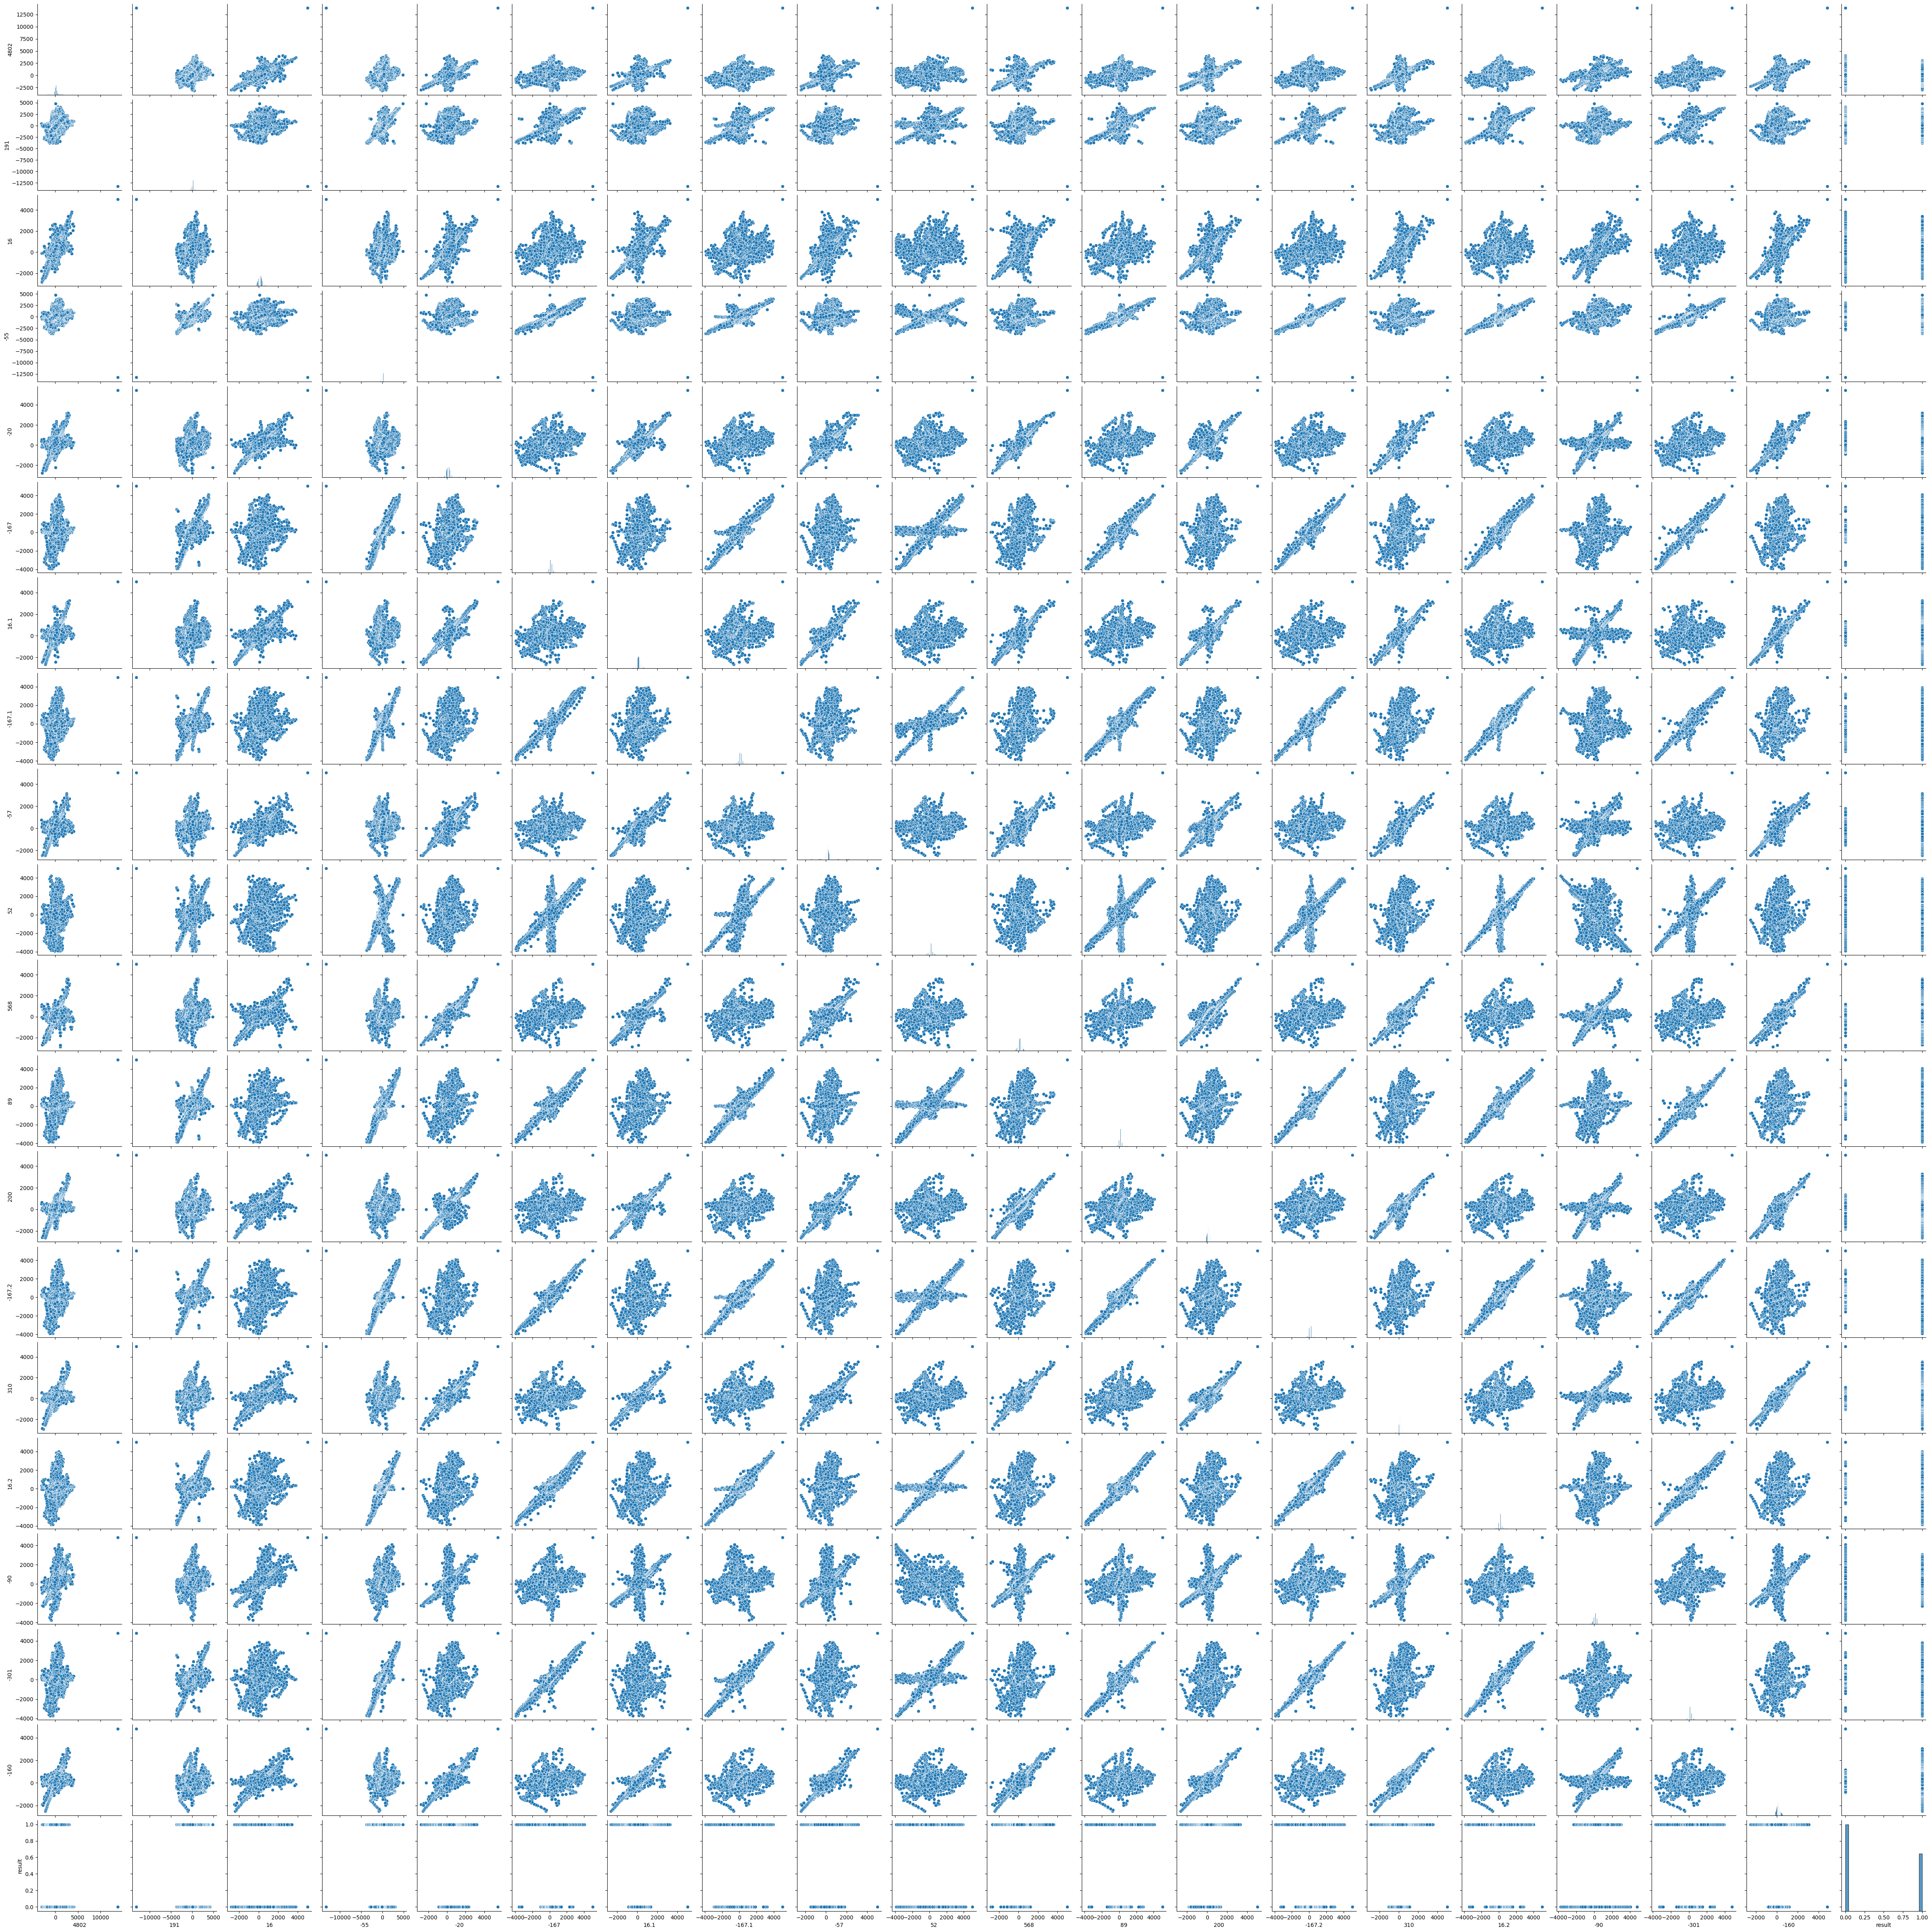

In [ ]:
# correlation in graphicial form
sns.pairplot(df)

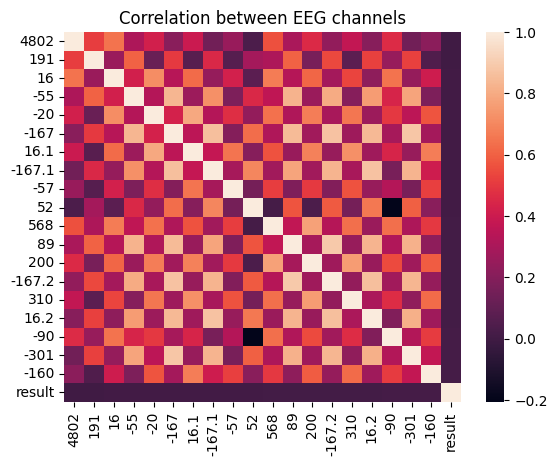

In [ ]:
# Create correlation matrix
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix)

# Add title
plt.title('Correlation between EEG channels')

# Display plot
plt.show()

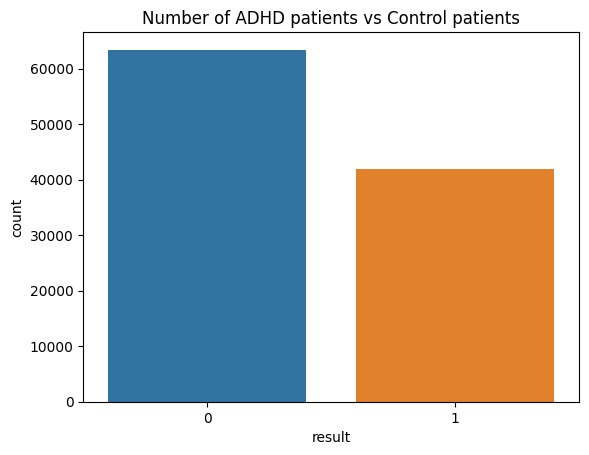

In [ ]:
# visualize the result column
sns.countplot(x='result', data=df)

# Add labels and title
plt.xlabel("result")
plt.ylabel("count")
plt.title("Number of ADHD patients vs Control patients")

# Display plot
plt.show()

# 4.DATA PREPARATION FOR *ALGORITHMS*

In [ ]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
# x_normalized = x / np.max(x)
x.columns


Index(['4802', '191', '16', '-55', '-20', '-167', '16.1', '-167.1', '-57',
       '52', '568', '89', '200', '-167.2', '310', '16.2', '-90', '-301',
       '-160'],
      dtype='object')

In [ ]:
y=pd.DataFrame(y)
y

result
0            0
1            0
2            0
3            0
4            0
...        ...
105332       1
105333       1
105334       1
105335       1
105336       1

[105337 rows x 1 columns]

In [ ]:
x.head()

4802  191   16  -55  -20  -167  16.1  -167.1   -57   52  568   89  200  \
0   191   50  457  367  752   457   641     604 -1198  310  420  273  420   
1   121   50   89 -160   89   126    52     347  1819  -20   89   52   89   
2   332  156  457  402  604   420   531     568  -646  420  678  273  494   
3   226  226  384  156  310   310   126     384   163   52  163  310   89   
4   297  191  126  -55   52    52   -94     200   825  163  200   89  163   

   -167.2  310  16.2  -90  -301  -160  
0     347  126   420  -90   297   473  
1      52   16    89  860   121   367  
2     457   89   384 -794   578   649  
3     163   52   236  860   -55    85  
4     126  -20   126  -90   226   332

In [ ]:
y.head()

result
0       0
1       0
2       0
3       0
4       0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# *4.MODEL DEVELOPMENT AND EVALUATION*

**Logistic** **Regression**

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
y_pred = lr_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[19011,     4],
       [12573,    14]])

In [ ]:
acs = accuracy_score(y_test, y_pred)
acs*100


60.20188595658502

**KNeighbours**

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
#confusion_matrix
y_pred = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18176,   839],
       [ 1642, 10945]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100


92.14923106132524

**GaussianNB**

In [ ]:
#Using GaussianNB method of naive_bayes class to use Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
#confusion_matrix
y_pred = gnb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16741,  2274],
       [ 9327,  3260]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

63.29029808239984

**Decision Tree Classifier**

In [ ]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#confusion_matrix
y_pred = dt_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[16553,  2462],
       [ 2394, 10193]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

84.63388393139675

RandomForest Classifier

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorith
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, y_train)

<ipython-input-50-cc603be30f30>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#confusion_matrix
y_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18206,   809],
       [ 2440, 10147]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

89.71900512625783

SVM


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have a labeled dataset with features (X) and labels (y)
# x_train, y_train = your_full_dataset

# Creating an instance of the Support Vector Classification model
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

# Training the SVM model on the full dataset
svm_classifier.fit(x_test, y_test)

# Making predictions on the full dataset
y_pred = svm_classifier.predict(x_test)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
 [[18412   603]
 [ 1834 10753]]
Accuracy: 0.92


In [ ]:
# Install BindsNET library
!pip install bindsnet

# Import necessary libraries
import torch
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.learning import PostPre, MSTDP
from bindsnet.encoding import PoissonEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming x_train and y_train are your training data and labels, and x_test is your test data
# Convert data to spike trains using PoissonEncoder
input_data = torch.Tensor(x_train)
enc = PoissonEncoder(time=100)
input_data = enc(input_data)

# Define network architecture
network = Network()
input_layer = Input(n=input_data.shape[1], traces=True)
hidden_layer = LIFNodes(n=100, traces=True)
output_layer = LIFNodes(n=10, traces=True)

network.add_layer(input_layer, name='Input Layer')
network.add_layer(hidden_layer, name='Hidden Layer')
network.add_layer(output_layer, name='Output Layer')

# Define connections
input_hidden_conn = Connection(source=input_layer, target=hidden_layer, w=torch.randn(input_layer.n, hidden_layer.n))
hidden_output_conn = Connection(source=hidden_layer, target=output_layer, w=torch.randn(hidden_layer.n, output_layer.n))

network.add_connection(input_hidden_conn, source='Input Layer', target='Hidden Layer')
network.add_connection(hidden_output_conn, source='Hidden Layer', target='Output Layer')

# Define monitors for recording activity
input_monitor = Monitor(obj=input_layer, state_vars=("s",), time=int(100))
hidden_monitor = Monitor(obj=hidden_layer, state_vars=("s",), time=int(100))
output_monitor = Monitor(obj=output_layer, state_vars=("s",), time=int(100))

network.add_monitor(monitor=input_monitor, name="Input Monitor")
network.add_monitor(monitor=hidden_monitor, name="Hidden Monitor")
network.add_monitor(monitor=output_monitor, name="Output Monitor")

# Define learning rule
pre = PostPre
post = PostPre
conn = Connection
lr = 1e-2

learning_rule = MSTDP(connections=[input_hidden_conn, hidden_output_conn], pre=pre, post=post, input_shape=input_data.shape, conn=conn, nu=[0, lr])

# Train the network
for i in range(len(input_data)):
    inputs = {"Input Layer": input_data[i].unsqueeze(0)}
    network.run(inputs=inputs, time=100, learning_rule=learning_rule)

# Assuming x_test is your test data
test_data = torch.Tensor(x_test)
test_data = enc(test_data)

# Test the network
test_inputs = {"Input Layer": test_data}
network.run(inputs=test_inputs, time=100)

# Get spike counts
hidden_spike_counts = hidden_monitor.get("s")
output_spike_counts = output_monitor.get("s")

# Use spike counts for classification
# (You may need to implement your own classification logic here, depending on your specific task)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.1 MB/s eta 0:00:00
  Created wheel for bindsnet: filename=bindsnet-0.2.7-py3-none-any.whl size=81397 sha256=f1dfe9d1a565b748de61d57830476540bc21afe0caf6e80fa5d16442daa2ff78
  Stored in directory: /root/.cache/pip/wheels/94/06/3c/ce96902a847c6a788c61ba6a27ab52a3bdc9e2405f702bac30
Successfully built bindsnet


ModuleNotFoundError: ignored

In [ ]:
pip install brian2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00


In [ ]:

from brian2 import *

# Assuming you have a dataset with features (X) and labels (y)
# Replace 'data' with the actual variable name containing your dataset

# Define parameters
duration = 1000 * ms  # Simulation duration
num_neurons = len(x_test.columns)  # Number of neurons in the input layer
num_classes = len(y_test['label'].unique())  # Number of output classes

# Extract features and labels
X = x_test.drop('label', axis=1).values
y = y_test['label'].values

# Create a spiking neural network
start_scope()

# Define neuron model (for simplicity, using leaky integrate-and-fire neurons)
tau = 10 * ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

input_neurons = NeuronGroup(num_neurons, eqs, threshold='v>1', reset='v=0', method='linear')

# Define synapses and connections
synapses = Synapses(input_neurons, output='v', on_pre='v += 0.2')
synapses.connect()

# Create output neurons
output_neurons = NeuronGroup(num_classes, eqs, threshold='v>1', reset='v=0', method='linear')

# Connect input neurons to output neurons
synapses_output = Synapses(input_neurons, output_neurons, on_pre='v += 0.2')
synapses_output.connect()

# Monitor spikes
input_spike_monitor = SpikeMonitor(input_neurons)
output_spike_monitor = SpikeMonitor(output_neurons)

# Run simulation
run(duration)

# Plot spikes (optional)
plot(input_spike_monitor.t/ms, input_spike_monitor.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
title('Input Neuron Spikes')
show()

plot(output_spike_monitor.t/ms, output_spike_monitor.i, '.r')
xlabel('Time (ms)')
ylabel('Neuron index')
title('Output Neuron Spikes')
show()


AttributeError: ignored